## This notebook iterates throught each session and computes the dominant frequency of each trial

### Data will be saved as a model to run stats and plotting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.io import loadmat
from scipy import ndimage
from scipy import stats 

import mne
from mne.time_frequency import tfr_array_multitaper, psd_array_multitaper
import pickle

from statsmodels.formula.api import ols, mixedlm
import statsmodels.api as sm

# Util functions for signal processing

In [2]:
"""
This cell contains useful functions to analyse the data
"""
def smooth_psd(p, sz=40, sigma=10):
    '''
    sz :  length of gaussFilter vector
    sigma = 10
    '''
    x = np.linspace(-sz / 2, sz / 2, sz);
    gaussFilter = np.exp(-x** 2 / (2 * sigma**2));
    gaussFilter = gaussFilter / sum (gaussFilter); # normalize
    pp = np.convolve(p, gaussFilter, 'same');
    return pp

# Load study related info

In [3]:
## Load study related info
with open('../Results/study_info.pickle', 'rb') as handle:
    study_info = pickle.load(handle,encoding='latin1')
    

density        = study_info['density'] 
speed          = study_info['speed'] 
dd             = study_info['dd'] ## Number of sensory cues (density)
dur            = study_info['dur'] ## Trial duration (sec)
K_i_idx        = study_info['K_i_idx']
K_i            = study_info['K_i']
uni            = study_info['uni']
t_dur          = study_info['t_dur']
t_dd           = study_info['t_dd']
sessions       = study_info['sessions'] 
ttl_idx        = study_info['ttl_idx']
hpc_electrodes = study_info['hpc_electrodes']
fs = study_info['fs']



## Load trial markers for each session
with open('../Results/trials_markers.pickle', 'rb') as handle:
    trials_markers = pickle.load(handle,encoding='latin1')

# Compute psd_multitaper per subject / trial / electrode 
### Be patient... it takes a while to compute (around 10 min)

In [28]:
# log_welch_0_1500_4_28_15_2

trial_begin           = 0
trial_end             = 1500
filter_data_low_freq  = 4
filter_data_high_freq = 28
smooth_psd_sz         = 15
smooth_psd_sigma      = 2

## Trial type
tmp_density = np.tile( np.repeat( np.arange(3), 3 ),3)
tmp_speed = np.tile( np.arange(3), 9 )
tmp_dur = [ 18.1, 13.5, 11]
tmp_dd = [50,100,150]

log_welch_nav = []
log_welch_iti = []
for sub in range(len(sessions)):

    lfp = loadmat('../Data/'+sessions[sub]+'.mat')
    lfp = lfp['ourData']
    idx_trials = trials_markers[sessions[sub]]

    tmp_welch_nav = []
    tmp_welch_iti = []
    for cc in hpc_electrodes[sub]:
        
        lfp[cc] = mne.filter.notch_filter( np.float64(lfp[cc]), fs, [50,100,150], notch_widths=20 )

        for trial in range(len(idx_trials)):
            
            if trial < len(idx_trials)-1:

                tmp_lfp = lfp[cc][ idx_trials[trial+1] - trial_end : idx_trials[trial+1] ]
                p,f = psd_array_multitaper( tmp_lfp, fs, fmin=3.5, fmax=8.5)
                p = smooth_psd(p, sz=smooth_psd_sz, sigma=smooth_psd_sigma)
                max_p = np.argmax( p )
                tmp_welch_iti.append( [cc, tmp_density[trial], tmp_speed[trial], tmp_dd[tmp_density[trial]]/tmp_dur[tmp_speed[trial]] , f[max_p] ] )

            
            
            tmp_lfp = lfp[cc][ idx_trials[trial] : idx_trials[trial] + trial_end ]
            p,f = psd_array_multitaper( tmp_lfp, fs, fmin=3.5, fmax=8.5)
            p = smooth_psd(p, sz=smooth_psd_sz, sigma=smooth_psd_sigma)
            max_p = np.argmax( p )
            tmp_welch_nav.append( [cc, tmp_density[trial], tmp_speed[trial], tmp_dd[tmp_density[trial]]/tmp_dur[tmp_speed[trial]] , f[max_p] ] )

            
    log_welch_iti.append(tmp_welch_iti)
    log_welch_nav.append(tmp_welch_nav)

log_welch_iti = np.array(log_welch_iti)
log_welch_nav = np.array(log_welch_nav)



## Now save it
# filename = '../Results/log_welch_inter_trial_interval' +'_'+ str(trial_begin) +'_'+ str(trial_end) +'_'+ str(filter_data_low_freq) +'_'+ str(filter_data_high_freq) +'_'+ str(smooth_psd_sz) +'_'+  str(smooth_psd_sigma)
# np.save(filename, log_welch)

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Us

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


In [30]:
log_wel_all = []
for ss in range(len(log_welch)):    
    for tt in range(len(log_welch[ss])):        
        log_wel_all.append( [ ss, log_welch[ss][tt][1] , log_welch[ss][tt][2] , log_welch[ss][tt][3] , log_welch[ss][tt][4] ] )        
log_wel_all = np.array(log_wel_all)



log_wel_all_iti = []
for ss in range(len(log_welch_iti)):    
    for tt in range(len(log_welch_iti[ss])):        
        log_wel_all_iti.append( [ ss, log_welch_iti[ss][tt][1] , log_welch_iti[ss][tt][2] , log_welch_iti[ss][tt][3] , log_welch_iti[ss][tt][4] ] )        
log_wel_all_iti = np.array(log_wel_all_iti)



log_wel_all_nav = []
for ss in range(len(log_welch_nav)):    
    for tt in range(len(log_welch_nav[ss])):        
        log_wel_all_nav.append( [ ss, log_welch_nav[ss][tt][1] , log_welch_nav[ss][tt][2] , log_welch_nav[ss][tt][3] , log_welch_nav[ss][tt][4] ] )        
log_wel_all_nav = np.array(log_wel_all_nav)


In [31]:
log_wel_all = pd.DataFrame(log_wel_all, columns=['sub','density','speed','cuesec','freq'] )
log_wel_all_iti = pd.DataFrame(log_wel_all_iti, columns=['sub','density','speed','cuesec','freq'] )
log_wel_all_nav = pd.DataFrame(log_wel_all_nav, columns=['sub','density','speed','cuesec','freq'] )

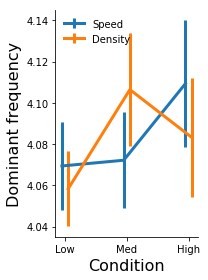

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(3)


mmd = log_wel_all.groupby(['density']).mean()['freq']
mms = log_wel_all.groupby(['speed']).mean()['freq']

ssd = log_wel_all.groupby(['density']).sem()['freq']
sss = log_wel_all.groupby(['speed']).sem()['freq']

plt.errorbar(  np.arange(3)-0.05, mms, yerr=sss, label='Speed', linewidth=3 )
plt.errorbar(  np.arange(3)+0.05, mmd, yerr=ssd, label='Density', linewidth=3  )


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)
plt.legend( frameon=False, loc='upper left')

plt.xlabel('Condition', fontsize=16)
plt.ylabel('Dominant frequency', fontsize=16)

plt.xticks(range(3), ['Low','Med','High'])

plt.tight_layout()

# plt.savefig('../Figures/theta_dominant_freq_both.pdf')

Pearson:  (0.054332860243224326, 0.12948885285121006)
               sum_sq     df         F    PR(>F)
freq        23.751125    1.0  2.303503  0.129489
Residual  8021.860185  778.0       NaN       NaN


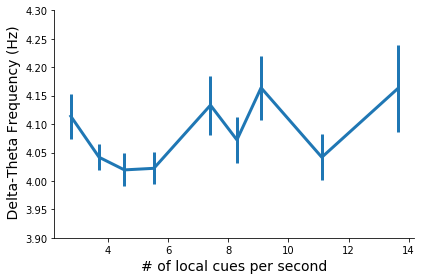

In [25]:
mmcs = log_wel_all.groupby(['cuesec']).mean()['freq']
sscs = log_wel_all.groupby(['cuesec']).sem()['freq']


fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(6)


ax.errorbar( uni, mmcs, yerr=sscs, linewidth=3 )
# sns.violinplot(data=log_wel_all.groupby(['cuesec']),  palette="Set3", bw=1.2, cut=2, linewidth=1 )


fig.patch.set_facecolor('xkcd:white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)

plt.ylabel(' Delta-Theta Frequency (Hz)', fontsize=14)
plt.xlabel('# of local cues per second', fontsize=14)

plt.ylim(3.9,4.3)

plt.tight_layout()


print( 'Pearson: ',  stats.pearsonr(log_wel_all.cuesec, log_wel_all.freq ))

cw_lm=ols('cuesec ~ freq', data=log_wel_all).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

# plt.savefig('../Figures/theta_dominant_freq_cues_per_sec.pdf')

In [26]:
real_control = 'control'


all_control = []


for iix in range(100):

    save_freq_in_cs =[]
    for cs in log_wel_all.cuesec.unique():
        idx = np.where( log_wel_all.cuesec==cs )[0]
        if real_control == 'control':
            idx = np.random.randint( 0, log_wel_all.shape[0], idx.size  )
        save_freq_in_cs.append( log_wel_all.freq[idx] )





    if real_control == 'real':
        rmm,rss = [],[]
        for ii in range(len(save_freq_in_cs)):    
            rmm.append(np.mean(save_freq_in_cs[ii]))
            rss.append(stats.sem(save_freq_in_cs[ii]))

    if real_control == 'control':
        control_mm,control_ss = [],[]
        for ii in range(len(save_freq_in_cs)):    
            control_mm.append(np.mean(save_freq_in_cs[ii]))
            control_ss.append(stats.sem(save_freq_in_cs[ii]))

        all_control.append(control_mm)
        
all_control = np.array(all_control)




control_m = np.mean(all_control,axis=0)
control_s = stats.sem(all_control,axis=0)


Pearson:  (0.054332860243224326, 0.12948885285121006)
               sum_sq     df         F    PR(>F)
freq        23.751125    1.0  2.303503  0.129489
Residual  8021.860185  778.0       NaN       NaN


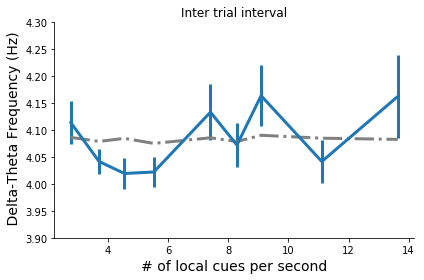

In [27]:
mmcs = log_wel_all.groupby(['cuesec']).mean()['freq']
sscs = log_wel_all.groupby(['cuesec']).sem()['freq']


fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(6)



plt.plot(uni, control_m, linestyle='-.', color='grey', linewidth=3 )
ax.errorbar( uni, mmcs, yerr=sscs, linewidth=3  )


fig.patch.set_facecolor('xkcd:white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)

plt.ylabel(' Delta-Theta Frequency (Hz)', fontsize=14)
plt.xlabel('# of local cues per second', fontsize=14)



plt.title('Inter trial interval')

plt.ylim(3.9,4.3)
plt.tight_layout()


print( 'Pearson: ',  stats.pearsonr(log_wel_all.cuesec, log_wel_all.freq ))

cw_lm=ols('cuesec ~ freq', data=log_wel_all).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

# plt.savefig('../Figures/theta_dominant_freq_cues_per_sec.pdf')

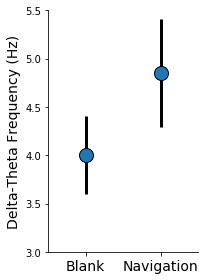

In [114]:
# plt.bar([0,1],[log_wel_all_iti.groupby('sub').mean().freq.mean(),log_wel_all_nav.groupby('sub').mean().freq.mean()],
#          yerr=[log_wel_all_iti.groupby('sub').mean().freq.std(),log_wel_all_nav.groupby('sub').mean().freq.std()])

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(3)



# plt.bar([0,1],[log_wel_all_iti.freq.median(),log_wel_all_nav.freq.mean()],
#          yerr=[log_wel_all_iti.freq.std(),log_wel_all_nav.freq.std()],
#          color='grey', width=0.6)

plt.errorbar([0,1],[log_wel_all_iti.freq.median(),log_wel_all_nav.freq.mean()],
         yerr=[log_wel_all_iti.freq.std(),log_wel_all_nav.freq.std()],
         color='k', linestyle='', linewidth=3, marker='o', markersize=14, markerfacecolor='#1f77b4')





fig.patch.set_facecolor('xkcd:white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim(-.5,1.5)
plt.ylim(3.,5.5)
plt.sca(ax)

plt.ylabel('Delta-Theta Frequency (Hz)', fontsize=14)
plt.xticks(  [0,1], ['Blank', 'Navigation'], fontsize=14)


plt.tight_layout()